In [1]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
from scipy.integrate import quad

1

In [14]:
# Define a bkg and bkg+signal model

def expo_fun(m, alpha=2.5**-2):
    return alpha*np.exp(-alpha*m)

def full_model(m, alpha=2.5**-2, mu=200, sigma=4, f_sig=0.05):
    return f_sig*(1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(m - mu)**2 / (2 * sigma**2))) + (1 - f_sig) * expo_fun(m, alpha)

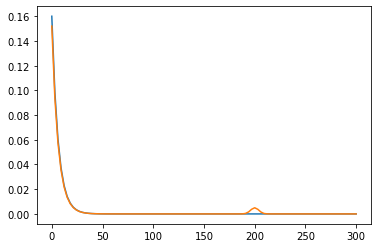

In [3]:
x = np.linspace(0, 300, 100)
y = expo_fun(x)
y_sig = full_model(x)
lims = (0, 400)
plt.plot(x, y);
plt.plot(x, y_sig);

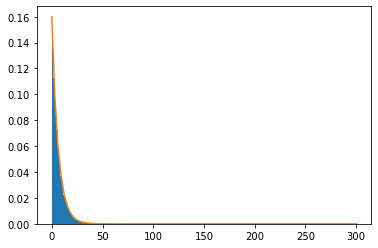

In [4]:
def generate_from_function(function, limits, N=10**6, *args):
    x = np.random.uniform(*limits, N)
    y = np.random.uniform(0.0, 1.0, N)
    return x[(y < function(x, *args))]

random_sample = generate_from_function(expo_fun, lims, 10**7, 2.5**-2)
plt.hist(random_sample, bins=50, density=True);
plt.plot(x, y);

2

In [5]:
data = np.loadtxt('LHCData.txt')
lims = (0, 400)
nbins = 50

In [6]:
hist, edges = np.histogram(data, nbins, lims)
centers = (edges[:-1] + edges[1:]) / 2

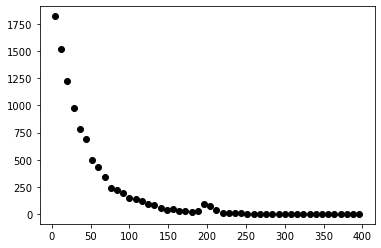

In [7]:
plt.plot(centers, hist, 'ko');

In [20]:
def get_integrals(function, edges, *args):
    return np.array([quad(lambda x: function(x, *args), left, right)[0] for left, right in zip(edges[:-1], edges[1:])])
    
def chi_square(pred, meas):
    return np.sum((pred - meas)**2)

def test_statistics(pred, meas):
    return chi_square(pred, meas) / len(data)

pred = len(data) * get_integrals(expo_fun, edges)
t_obs = chi_square(pred, hist) / len(hist)

In [21]:
t_obs

645443.3864359347

In [12]:
%%time 
N_samples = 100
test_statistics_values = []
for i in range(N_samples):
    sample = generate_from_function(expo_fun, lims, 10**7, 2.5**-2)
    histogram, _ = np.histogram(sample, nbins, lims)
    pred = len(data) * get_integrals(expo_fun, edges, 2.5**-2)
    t = test_statistics(pred, histogram)
    test_statistics_values.append(t)

CPU times: user 18.8 s, sys: 61.4 ms, total: 18.9 s
Wall time: 18.9 s


In [15]:
%%time 
N_samples = 100
test_statistics_values_alt = []
for i in range(N_samples):
    sample = generate_from_function(full_model, lims, 10**7)
    histogram, _ = np.histogram(sample, nbins, lims)
    pred = len(data) * get_integrals(full_model, edges)
    t = test_statistics(pred, histogram)
    test_statistics_values_alt.append(t)

CPU times: user 27.2 s, sys: 91.7 ms, total: 27.3 s
Wall time: 27.3 s


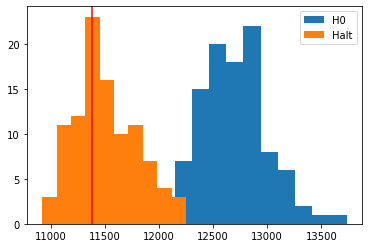

In [22]:
plt.hist(test_statistics_values, label="H0");
plt.hist(test_statistics_values_alt, label="Halt");
plt.axvline(x=t, color="r")
plt.legend();